In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [20]:
# Load data
data = pd.read_csv("kc_house_data.csv")

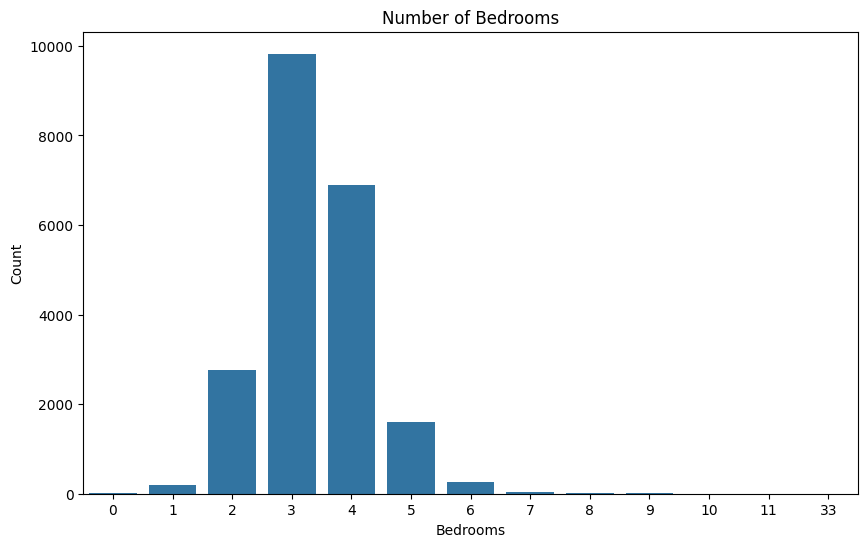

In [21]:
# Exploratory Data Analysis
plt.figure(figsize=(10,6))
sns.barplot(x=data['bedrooms'].value_counts().index, y=data['bedrooms'].value_counts().values)
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.show()

<Figure size 1000x1000 with 0 Axes>

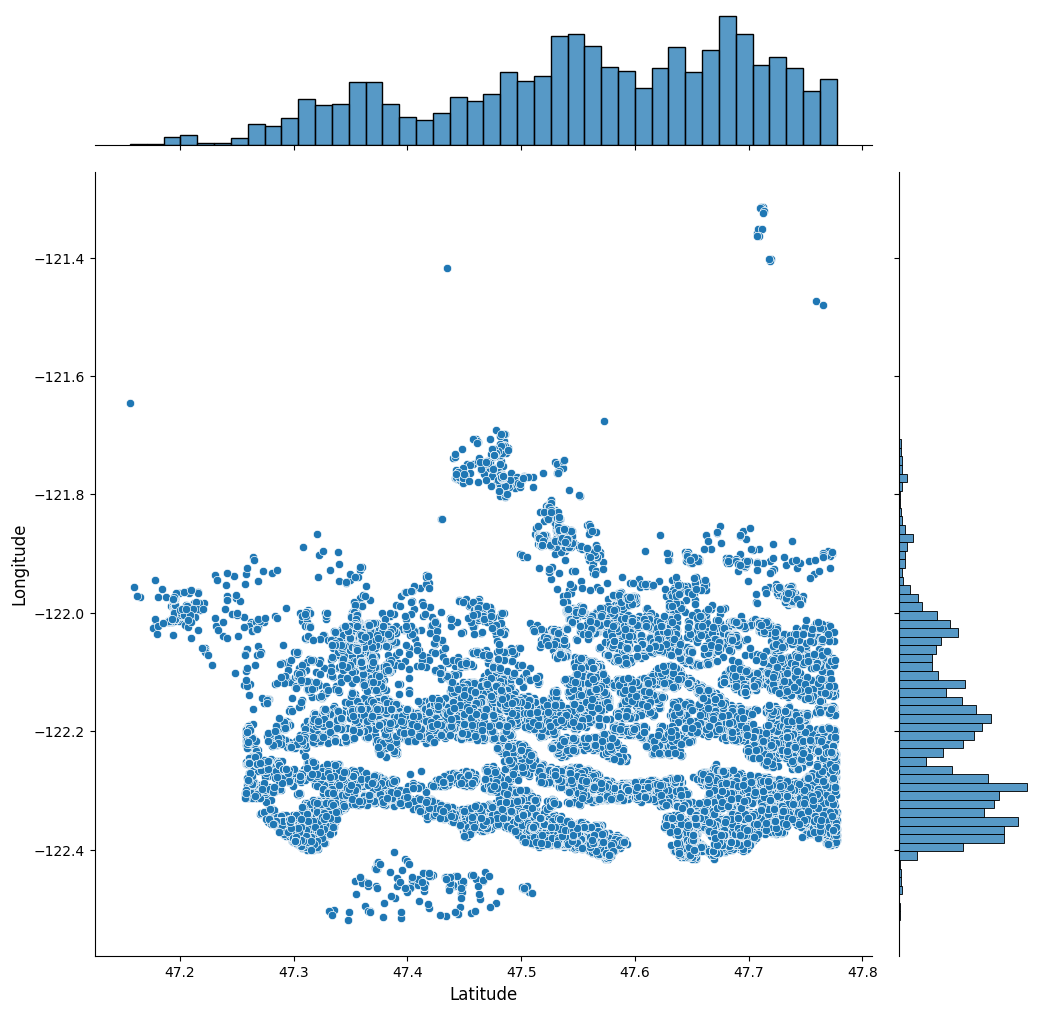

In [22]:
plt.figure(figsize=(10,10))
sns.jointplot(x=data.lat.values, y=data.long.values, height=10)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Longitude', fontsize=12)
plt.show()

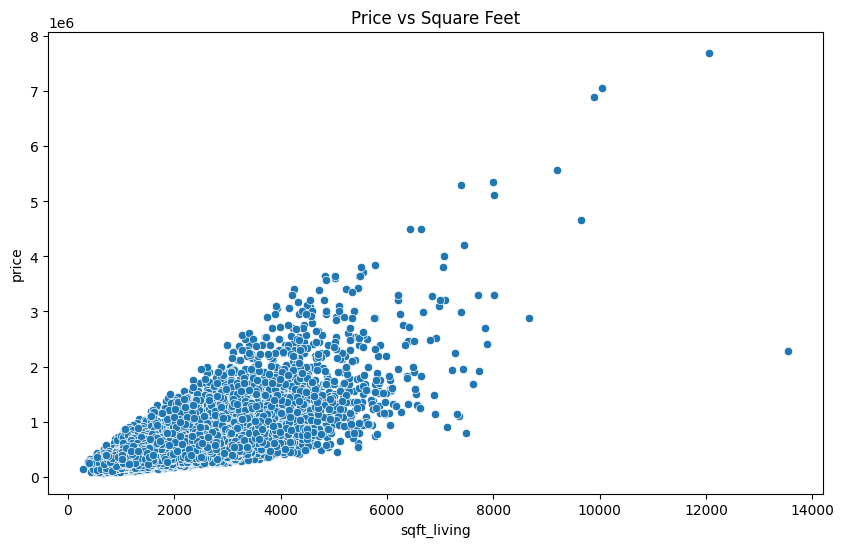

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='sqft_living', y='price', data=data)
plt.title('Price vs Square Feet')
plt.show()

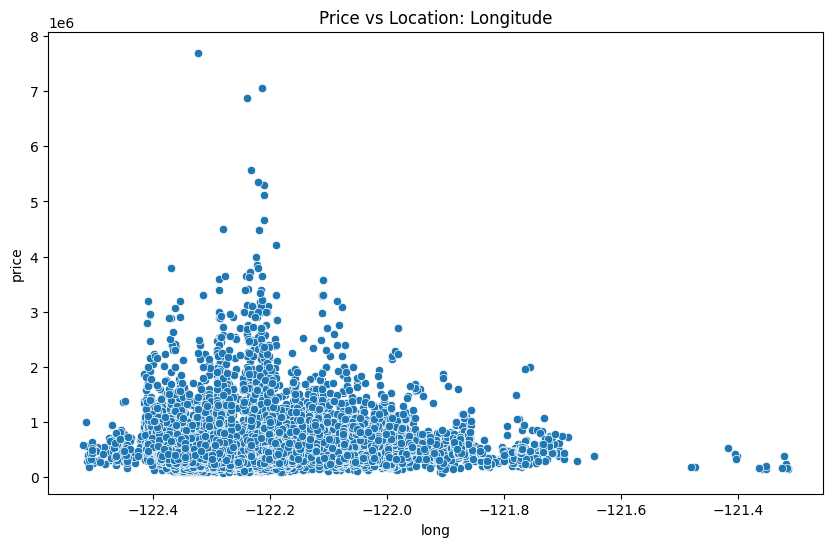

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='long', y='price', data=data)
plt.title('Price vs Location: Longitude')
plt.show()

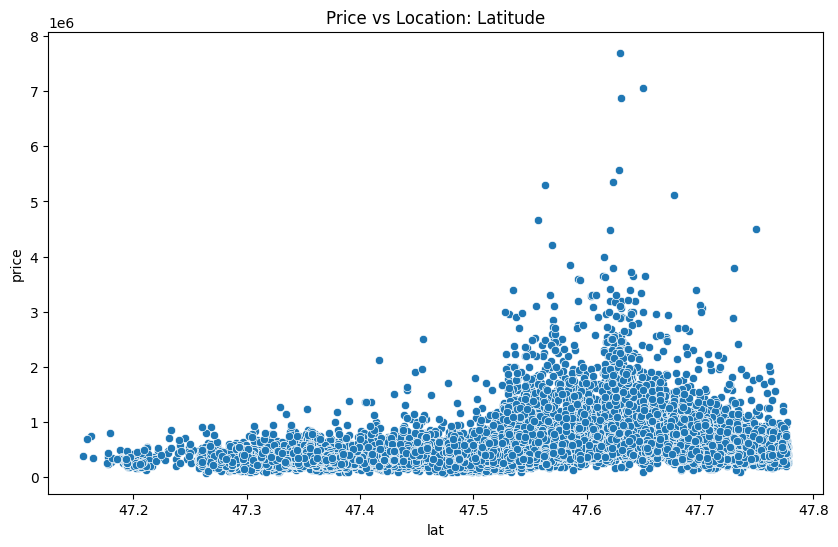

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='lat', y='price', data=data)
plt.title('Price vs Location: Latitude')
plt.show()

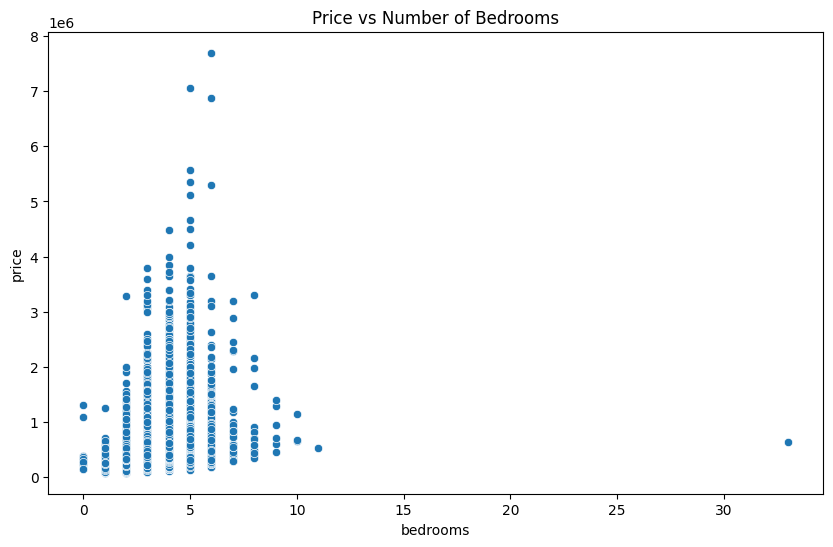

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='bedrooms', y='price', data=data)
plt.title('Price vs Number of Bedrooms')
plt.show()

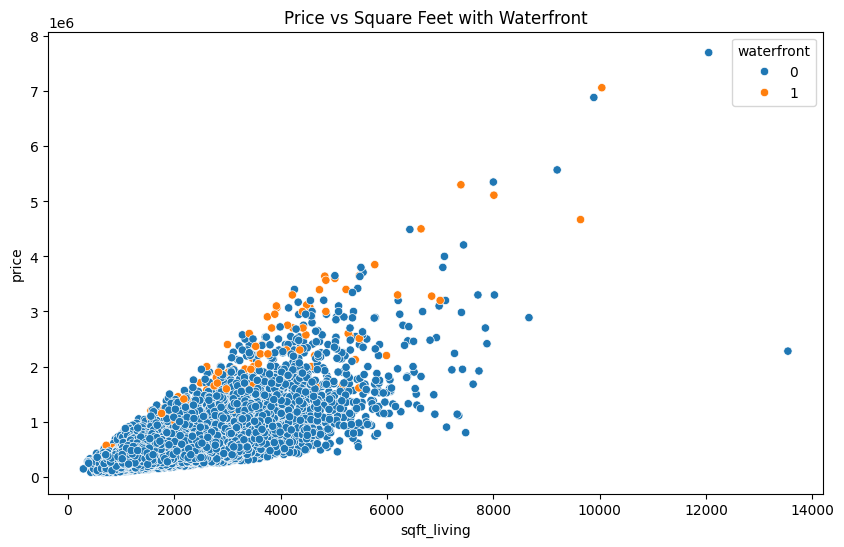

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='sqft_living', y='price', data=data, hue='waterfront')
plt.title('Price vs Square Feet with Waterfront')
plt.show()

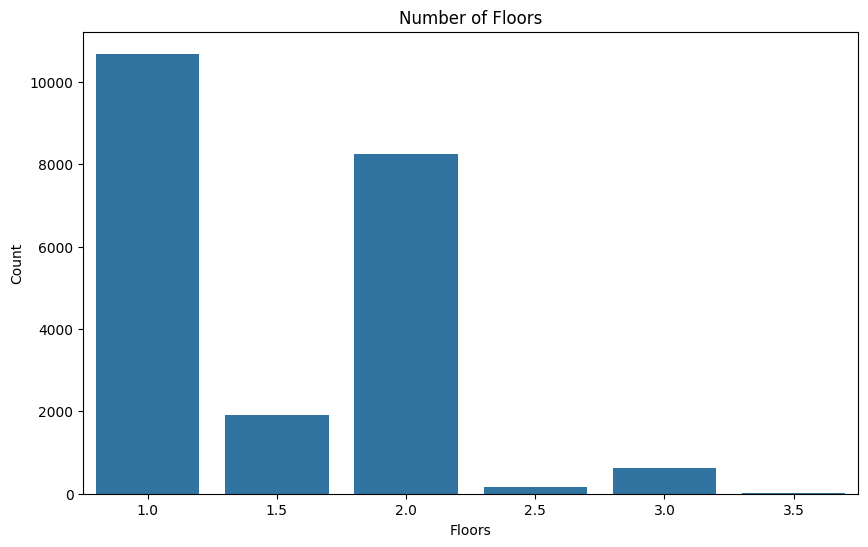

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(x=data['floors'].value_counts().index, y=data['floors'].value_counts().values)
plt.title('Number of Floors')
plt.xlabel('Floors')
plt.ylabel('Count')
plt.show()

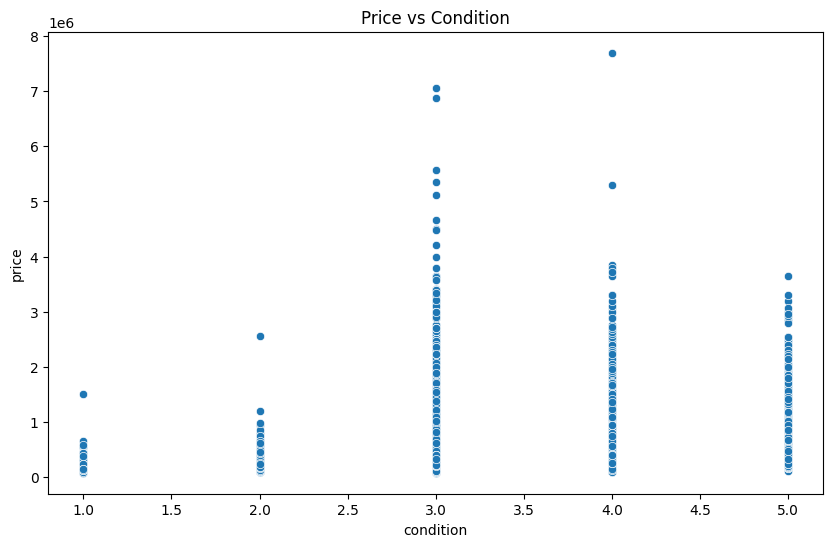

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='condition', y='price', data=data)
plt.title('Price vs Condition')
plt.show()

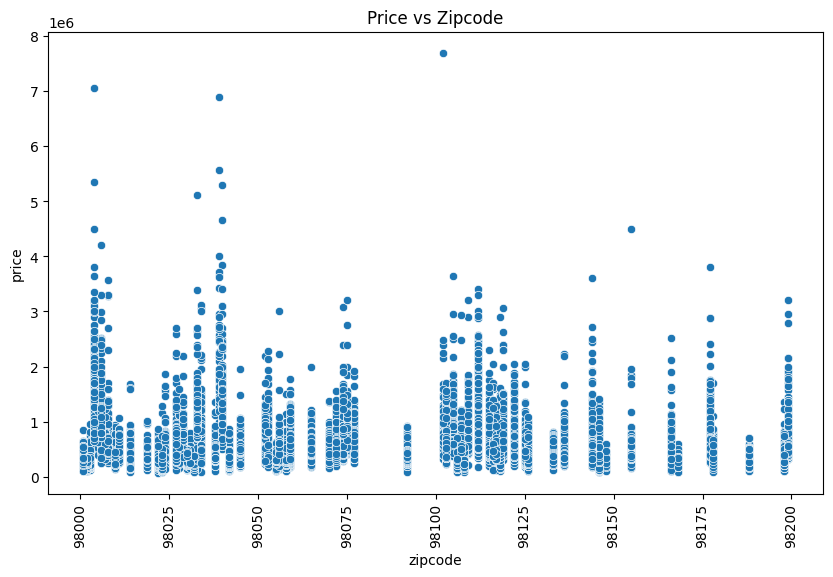

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='zipcode', y='price', data=data)
plt.title('Price vs Zipcode')
plt.xticks(rotation=90)
plt.show()

In [31]:
# Preprocessing
X = data.drop(['id', 'date', 'price'], axis=1)
y = data['price']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [32]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.1, random_state=42)

In [33]:
# Train Linear Regression model
reg = LinearRegression()
reg.fit(X_train, y_train)
linear_score = reg.score(X_test, y_test)
print(f"Linear Regression R-squared Score: {linear_score}")

Linear Regression R-squared Score: 0.6901951683354386


In [34]:
# Train Gradient Boosting Regressor model
clf = GradientBoostingRegressor(n_estimators=400, max_depth=5, min_samples_split=2, learning_rate=0.1)
clf.fit(X_train, y_train)
gradient_boosting_score = clf.score(X_test, y_test)
print(f"Gradient Boosting Regressor R-squared Score: {gradient_boosting_score}")


KeyboardInterrupt: 